# Week2_Breast_Cancer_HW2

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()

X = data['data']
y = data['target']

SC = StandardScaler()
SC.fit(X)
X = SC.transform(X)

# PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [2]:
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score, roc_curve, auc, accuracy_score
def model_predict(model,X_train,y_train,X_test,y_test):
    x0_min, x0_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x1_min, x1_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x0_min, x0_max, 0.1), np.arange(x1_min, x1_max, 0.1))
    
    model.fit(X_train, y_train)

    fpr, tpr , _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr,tpr)

    precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
    prc_auc = auc(recall,precision)
    return_dict = {
        "train_acc": accuracy_score(y_train, model.predict(X_train)),
        "test_acc": accuracy_score(y_test, model.predict(X_test)),
        "train_pre": precision_score(y_train, model.predict(X_train)),
        "test_pre": precision_score(y_test, model.predict(X_test)),
        "train_re": recall_score(y_train, model.predict(X_train)),
        "test_re": recall_score(y_test, model.predict(X_test)),
        "train_f1": f1_score(y_train, model.predict(X_train)),
        "test_f1": f1_score(y_test, model.predict(X_test)),
        "train_roc": roc_auc,
        "test_prc": prc_auc,
    }
    return return_dict

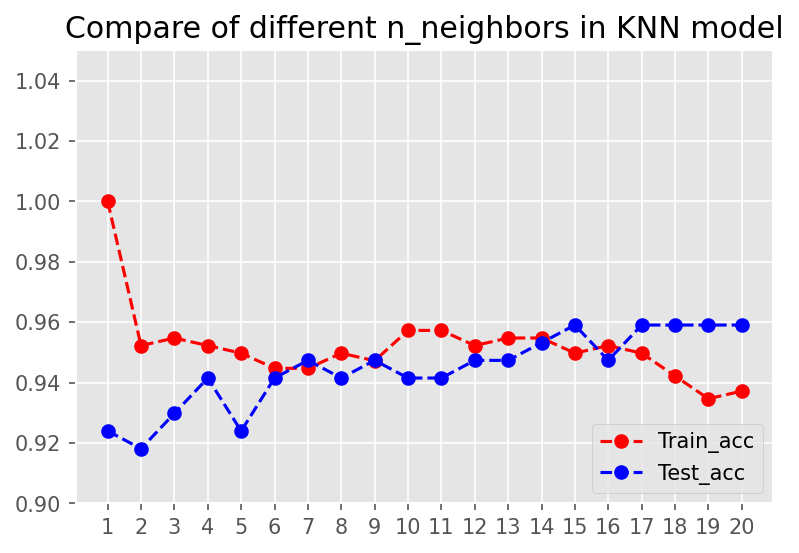

In [5]:
from sklearn.neighbors import KNeighborsClassifier
result_list = list()
n_list = [ n for n in range(1,21)]

for n in n_list:
    model = KNeighborsClassifier(n_neighbors = n)
    result_list.append(model_predict(model, X_train, y_train, X_test, y_test))

style.use('ggplot')
plt.figure(dpi=150)
plt.title('Compare of different n_neighbors in KNN model')
plt.plot(n_list, [i['train_acc'] for i in result_list],'o--',color = 'r', label="Train_acc")
plt.plot(n_list, [i['test_acc'] for i in result_list],'o--',color = 'b', label="Test_acc")
plt.ylabel='Score'
plt.xlabel='n_neighbors'
plt.xticks(n_list)
plt.ylim([0.9, 1.05])
plt.legend(loc = "lower right")
plt.show()